in this code i cleaned Raw data as well as for business model i analysed data in this code but for better understatnding 
of model you would have to see my ppt and business rules i made.

In [139]:
 #code will work on df2 name data which is partial clean data of given data

#importing library 

In [2]:
import pandas as pd
from pandas import DataFrame
from pandas import Series
import matplotlib.pyplot as plt
import numpy as np
from fuzzywuzzy import fuzz
from functools import partial
from fuzzywuzzy import process

C:\Users\lohani\Anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [3]:
#loading dataset

In [4]:
df = pd.read_excel(r'C:\Users\lohani\Desktop\projects\peacock solar\data\df2.xlsx')

In [5]:
df.head()

,Marital Status,What is the type of home that you own?,What percentage of your roof are you ready to give for solar?,"Do you plan to build an additional floor? (If other, what does it depend on?)",Plot size of the house (In Square yards),average monthly earnings,What Power Backup do you use?,How much aware are you about solar?,pwrbckup,elec_price_inc,...,Which one would you prefer?,Name the Solar company you know,Who owns the house you live in?,State,Which city is your house at?,Sex,Male,homeloan,knowsolar,relativehave
0,Single,Independent house or Villa,12.5,No,115,85000,"Solar, Inverter",3,1,3,...,"No, I'd not like to buy solar",Don't know any,My parents,Uttar Pradesh,Raebareli,0,1,0,0,0
1,Single,Independent house or Villa,12.5,No,130,10000,Solar,1,1,2,...,"No, I'd not like to buy solar",Namaste,My parents,Telangana,Hyderabad,1,0,0,1,1
2,Single,Independent house or Villa,37.5,No,25,10000,Solar,5,4,1,...,Avail solar electricity at 50% down payment an...,Sun power,Landlord,Delhi,Delhi,1,0,0,1,1
3,Single,Apartment or Flat,12.5,Yes,Idk,10000,"Solar, Inverter",3,3,3,...,Saving 1000+/month saving on electricity bill ...,None,My parents,Maharashtra,Mumbai,0,1,1,1,1
4,Single,Independent house or Villa,62.5,No,340,250000,Solar,5,3,2,...,Avail solar electricity at 50% down payment an...,Effisol energy solutions,My parents,Maharashtra,Vizag,1,0,0,1,1


In [6]:
df.dtypes

Marital Status                                                                    object
What is the type of home that you own?                                            object
What percentage of your roof are you ready to give for solar?                    float64
Do you plan to build an additional floor? (If other, what does it depend on?)     object
Plot size of the house (In Square yards)                                          object
average monthly earnings                                                           int64
What Power Backup do you use?                                                     object
How much aware are you about solar?                                                int64
pwrbckup                                                                           int64
elec_price_inc                                                                     int64
bill_save                                                                          int64
lowmaint             

In [7]:
#changing data type 

In [8]:
df['Sex'] = df['Sex'].astype('category')
df['homeloan'] = df['homeloan'].astype('category')
df['relativehave'] = df['relativehave'].astype('category')
df['knowsolar'] = df['knowsolar'].astype('category')
df['except_least_save_elec'] = df['except_least_save_elec'].astype('category')
df['roofnotsuitable'] = df['roofnotsuitable'].astype('category')
df['not_know_installer'] = df['not_know_installer'].astype('category')
df['dont_undr_solr'] = df['dont_undr_solr'].astype('category')
df['outlook_house'] = df['outlook_house'].astype('category')
df['highcost'] = df['highcost'].astype('category')
df['lack_loan'] = df['lack_loan'].astype('category')
df['lack_govt'] = df['lack_govt'].astype('category')
df['not_suff_money'] = df['not_suff_money'].astype('category')
df['inv_pay_back'] = df['inv_pay_back'].astype('category')

In [9]:
df['earnfromroof'] = df['earnfromroof'].astype('category')
df['status_symbol'] = df['status_symbol'].astype('category')
df['env_fri'] = df['env_fri'].astype('category')
df['newtec'] = df['newtec'].astype('category')
df['lowmaint'] = df['lowmaint'].astype('category')
df['bill_save'] = df['bill_save'].astype('category')
df['elec_price_inc'] = df['elec_price_inc'].astype('category')
df['pwrbckup'] = df['pwrbckup'].astype('category')
df['How much aware are you about solar?'] = df['How much aware are you about solar?'].astype('category')

In [12]:
#changing all responses into lower case 

In [13]:
df['What is the type of home that you own?'] = df['What is the type of home that you own?'].str.lower()
df['Do you plan to build an additional floor? (If other, what does it depend on?)'] = df['Do you plan to build an additional floor? (If other, what does it depend on?)'].str.lower()
df['Name the Solar company you know'] = df['Name the Solar company you know'].str.lower()
df['What Power Backup do you use? '] = df['What Power Backup do you use? '].str.lower()
df['Plot size of the house (In Square yards)'] = df['Plot size of the house (In Square yards)'].str.lower()

In [14]:
# removing all spaces present between responses 

In [15]:
df['What is the type of home that you own?'] = df['What is the type of home that you own?'].str.strip()
df['Do you plan to build an additional floor? (If other, what does it depend on?)'] = df['Do you plan to build an additional floor? (If other, what does it depend on?)'].str.strip()
df['Name the Solar company you know'] = df['Name the Solar company you know'].str.strip()
df['What Power Backup do you use? '] = df['What Power Backup do you use? '].str.strip()
df['Plot size of the house (In Square yards)'] = df['Plot size of the house (In Square yards)'].str.strip()

In [ ]:
# cleaning home type column 
#checking what are are unique responses of home type
# changing some similar name of house type into 'independent house or villa'

In [ ]:
df['What is the type of home that you own?'].unique()

In [19]:
df['What is the type of home that you own?'] = df['What is the type of home that you own?'].replace({'independent house':'independent house or villa', 'my permanent home':'independent house or villa', 'own house':'independent house or villa', '3floors building':'independent house or villa'})

In [20]:
#counting no. of different types houses 

In [21]:
df.groupby('What is the type of home that you own?').count()

,Marital Status,What percentage of your roof are you ready to give for solar?,"Do you plan to build an additional floor? (If other, what does it depend on?)",Plot size of the house (In Square yards),average monthly earnings,What Power Backup do you use?,How much aware are you about solar?,pwrbckup,elec_price_inc,bill_save,...,Which one would you prefer?,Name the Solar company you know,Who owns the house you live in?,State,Which city is your house at?,Sex,Male,homeloan,knowsolar,relativehave
What is the type of home that you own?,,,,,,,,,,,,,,,,,,,,,
apartment or flat,1120,1120,1120,207,1120,1120,1120,1120,1120,1120,...,1120,1021,1120,1118,1120,1120,1120,1120,1120,1120
assam type,2,2,2,0,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
at my mom's house,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
calling house,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
company house,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
study,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
ui,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
village,1,1,1,0,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1


In [22]:
#creating dummies of house type 
#independent house or villa = 1
# dropping 'What is the type of home that you own?', 'Sex', 'Marital Status', "Who owns the house you live in?" as unnecessary column

In [23]:
dummy = pd.get_dummies(df['What is the type of home that you own?'])
df = pd.concat((df, dummy['independent house or villa']), axis =1)
df = df.drop(['What is the type of home that you own?', 'Sex', 'Marital Status', "Who owns the house you live in?"], axis=1)

In [24]:
#changing name of male as sex and 'independent house or villa' as 'ownhome'

In [25]:
df = df.rename(columns = {'Male' : 'sex', 'independent house or villa': 'ownhome'})

In [26]:
df.head()

,What percentage of your roof are you ready to give for solar?,"Do you plan to build an additional floor? (If other, what does it depend on?)",Plot size of the house (In Square yards),average monthly earnings,What Power Backup do you use?,How much aware are you about solar?,pwrbckup,elec_price_inc,bill_save,lowmaint,...,What maximum investment would you be willing to make in solar?,Which one would you prefer?,Name the Solar company you know,State,Which city is your house at?,sex,homeloan,knowsolar,relativehave,ownhome
0,12.5,no,NaN,85000,"solar, inverter",3,1,3,2,2,...,25000,"No, I'd not like to buy solar",don't know any,Uttar Pradesh,Raebareli,1,0,0,0,1
1,12.5,no,NaN,10000,solar,1,1,2,1,1,...,25000,"No, I'd not like to buy solar",namaste,Telangana,Hyderabad,0,0,1,1,1
2,37.5,no,NaN,10000,solar,5,4,1,4,4,...,25000,Avail solar electricity at 50% down payment an...,sun power,Delhi,Delhi,0,0,1,1,1
3,12.5,yes,idk,10000,"solar, inverter",3,3,3,3,3,...,25000,Saving 1000+/month saving on electricity bill ...,none,Maharashtra,Mumbai,1,1,1,1,0
4,62.5,no,NaN,250000,solar,5,3,2,3,3,...,150000,Avail solar electricity at 50% down payment an...,effisol energy solutions,Maharashtra,Vizag,0,0,1,1,1


In [132]:
# cleaning Do you plan to build an additional floor? (If other, what does it depend on?  column 
#checking what are are unique responses

In [29]:
df['Do you plan to build an additional floor? (If other, what does it depend on?)'].unique()

array(['no', 'yes', 'dont have any idea yet', 'm nt the owner',
       'if there will be a need', 'situation or need', 'not my house',
       'financial stability', "it's a flat", "it's a rented house",
       'living in rent house', 'whether or not aunt decides to move in',
       'when my parents decide to', 'idk', 'the house is not mine.',
       'not independent flat',
       "it's not my own house to build n extra floor",
       "it's a rent house", 'its a flat',
       "i want to build another floor but my girlfriend said she doesn't want so i m still trying to convince her , but i will tell you if we are building",
       "can't ..we live in an apartment", 'maybe', 'if required', 'hi',
       'it depends upon bank balance', "landlord's wish", 'may be',
       'paisa nai he', 'it is not allowed on company quarter',
       'i donot own house', 'maybe in future', 'my job', 'budget',
       'not yet decided', 'its a society', "it's a rented flat.", '.',
       'depedns on dda orders

In [30]:
#creating dummies of Do you plan to build an additional floor?
#yes = 1
# dropping 'Do you plan to build an additional floor? (If other, what does it depend on?)'
# renaming yes as 'plantobuildflor'

In [31]:
dummy = pd.get_dummies(df['Do you plan to build an additional floor? (If other, what does it depend on?)'])
df = pd.concat((df, dummy['yes']), axis =1)
df = df.drop(['Do you plan to build an additional floor? (If other, what does it depend on?)'], axis=1)
df = df.rename(columns = {'yes': 'plantobuildflor'})

In [32]:
#cleaning Name the Solar company you know 
# checking what are are unique responses of Name the Solar company you know

In [33]:
df['Name the Solar company you know'].unique()

array(["don't know any", 'namaste', 'sun power', ...,
       'solar roof - tesla', 'soura natural energy solutions pvt ltd',
       'solarpwr'], dtype=object)

In [34]:
df.groupby('Name the Solar company you know').count()

,What percentage of your roof are you ready to give for solar?,Plot size of the house (In Square yards),average monthly earnings,What Power Backup do you use?,How much aware are you about solar?,pwrbckup,elec_price_inc,bill_save,lowmaint,newtec,...,What maximum investment would you be willing to make in solar?,Which one would you prefer?,State,Which city is your house at?,sex,homeloan,knowsolar,relativehave,ownhome,plantobuildflor
Name the Solar company you know,,,,,,,,,,,,,,,,,,,,,
-,38,18,38,38,38,38,38,38,38,38,...,38,38,38,38,38,38,38,38,38,38
-none-,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
.,16,4,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
..,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
...,2,0,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zun roof,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"zun, kotak, urja",1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
zunroof,9,2,9,9,9,9,9,9,9,9,...,9,9,9,9,9,9,9,9,9,9


In [35]:
#string matching using fuzzy-wuzzy

In [36]:
categories = ['peacock']

In [37]:
categories

['peacock']

In [38]:
for company in categories:
          matches = process.extract(company, df['Name the Solar company you know'], 
                            limit = df.shape[0])

In [39]:
  for possible_match in matches:
    if possible_match[1] >= 70:
      # Find matching cuisine type
      matching_cuisine = df['Name the Solar company you know'] == possible_match[0]
      df.loc[matching_cuisine, 'Name the Solar company you know'] = company


In [40]:
#creating dummies of Name the Solar company you know
# peacock = 1
# dropping Name the Solar company you know
# renaming peacock' as 'knowpeacock'

In [41]:
dummy = pd.get_dummies(df['Name the Solar company you know'])

In [42]:
df = pd.concat((df, dummy['peacock']), axis =1)
df = df.drop(['Name the Solar company you know'], axis=1)
df = df.rename(columns = {'peacock': 'knowpeacock'})

In [43]:
df.groupby('knowpeacock').count()

,What percentage of your roof are you ready to give for solar?,Plot size of the house (In Square yards),average monthly earnings,What Power Backup do you use?,How much aware are you about solar?,pwrbckup,elec_price_inc,bill_save,lowmaint,newtec,...,What maximum investment would you be willing to make in solar?,Which one would you prefer?,State,Which city is your house at?,sex,homeloan,knowsolar,relativehave,ownhome,plantobuildflor
knowpeacock,,,,,,,,,,,,,,,,,,,,,
0,3550,823,3550,3550,3550,3550,3550,3550,3550,3550,...,3550,3550,3545,3548,3550,3550,3550,3550,3550,3550
1,985,176,985,985,985,985,985,985,985,985,...,985,985,985,985,985,985,985,985,985,985


In [ ]:
# cleaning wWhat Power Backup do you use? column 
#1st by viewing what are unique values
#renaming those which are similar to solar as solar
#renaming those which are similar to invertor as invertor
#renaming those which are similar to generator as generator 

In [44]:
df.groupby('What Power Backup do you use? ').count()

,What percentage of your roof are you ready to give for solar?,Plot size of the house (In Square yards),average monthly earnings,How much aware are you about solar?,pwrbckup,elec_price_inc,bill_save,lowmaint,newtec,env_fri,...,Which one would you prefer?,State,Which city is your house at?,sex,homeloan,knowsolar,relativehave,ownhome,plantobuildflor,knowpeacock
What Power Backup do you use?,,,,,,,,,,,,,,,,,,,,,
apartment' as a whole has a diesel generator,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
applied for solar,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
backup not required,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
"candle, rechargable emergency light",1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
candles,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
captive power pack for whole colonyy,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
cng,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
diesel generator,282,61,282,282,282,282,282,282,282,282,...,282,282,282,282,282,282,282,282,282,282
"diesel generator, inverter",117,15,117,117,117,117,117,117,117,117,...,117,117,117,117,117,117,117,117,117,117


In [46]:
df['What Power Backup do you use? '].unique()

array(['solar, inverter', 'solar', 'inverter', 'no backup',
       'diesel generator, solar, inverter, no backup', 'none',
       'inverter, no backup', 'diesel generator, inverter',
       'diesel generator', 'solar, no backup',
       'diesel generator, solar, inverter',
       'candle, rechargable emergency light', 'diesel generator, solar',
       'solar, inverter, no backup', 'society power back up',
       'two connections', 'nai batana', 'h',
       "light doesn't go in our area", 'diesel generator, no backup',
       'candles', 'diesel generator, inverter, no backup', 'no',
       'ja solar', 'no idea', 'society generator',
       'hindalco provides electricity 24*7', 'genset',
       'backup not required', 'generator backed up for the society',
       'inverter, power house', 'diesel generator, solar, no backup',
       'solar, inverter, converter',
       "apartment' as a whole has a diesel generator", 'solar, light',
       'owned thermal power plant', 'cng', 'g e.b', 'appli

In [47]:
cat = ['solar']

In [48]:
for backup in cat:
          matches1 = process.extract(backup, df['What Power Backup do you use? '], 
                            limit = df.shape[0])

In [49]:
matches1

[('solar', 100, 1),
 ('solar', 100, 2),
 ('solar', 100, 4),
 ('solar', 100, 5),
 ('solar', 100, 6),
 ('solar', 100, 7),
 ('solar', 100, 8),
 ('solar', 100, 10),
 ('solar', 100, 21),
 ('solar', 100, 26),
 ('solar', 100, 47),
 ('solar', 100, 177),
 ('solar', 100, 230),
 ('solar', 100, 234),
 ('solar', 100, 267),
 ('solar', 100, 278),
 ('solar', 100, 283),
 ('solar', 100, 296),
 ('solar', 100, 384),
 ('solar', 100, 389),
 ('solar', 100, 391),
 ('solar', 100, 451),
 ('solar', 100, 455),
 ('solar', 100, 581),
 ('solar', 100, 653),
 ('solar', 100, 675),
 ('solar', 100, 797),
 ('solar', 100, 804),
 ('solar', 100, 905),
 ('solar', 100, 919),
 ('solar', 100, 920),
 ('solar', 100, 921),
 ('solar', 100, 924),
 ('solar', 100, 972),
 ('solar', 100, 975),
 ('solar', 100, 1000),
 ('solar', 100, 1064),
 ('solar', 100, 1078),
 ('solar', 100, 1082),
 ('solar', 100, 1091),
 ('solar', 100, 1098),
 ('solar', 100, 1104),
 ('solar', 100, 1125),
 ('solar', 100, 1142),
 ('solar', 100, 1143),
 ('solar', 100, 11

In [50]:
  for possible_match in matches1:
    if possible_match[1] >= 60:
      # Find matching cuisine type
      matching_backup = df['What Power Backup do you use? '] == possible_match[0]
      df.loc[matching_backup, 'What Power Backup do you use? '] = backup

In [51]:
df['What Power Backup do you use? '].unique()

array(['solar', 'inverter', 'no backup', 'none', 'inverter, no backup',
       'diesel generator, inverter', 'diesel generator',
       'candle, rechargable emergency light', 'society power back up',
       'two connections', 'nai batana', 'h',
       "light doesn't go in our area", 'diesel generator, no backup',
       'candles', 'diesel generator, inverter, no backup', 'no',
       'no idea', 'society generator',
       'hindalco provides electricity 24*7', 'genset',
       'backup not required', 'generator backed up for the society',
       'inverter, power house',
       "apartment' as a whole has a diesel generator",
       'owned thermal power plant', 'cng', 'g e.b',
       'captive power pack for whole colonyy',
       'diesel generator, shalinee shekhar', 'mi power bank',
       'nuclear reactor', 'electrycity'], dtype=object)

In [52]:
df.groupby(['What Power Backup do you use? ', 'State']).count()

What percentage of your roof are you ready to give for solar?  \
What Power Backup do you use?                State                                                                           
apartment' as a whole has a diesel generator Madhya Pradesh                                                  1               
backup not required                          Andhra Pradesh                                                  1               
candle, rechargable emergency light          West Bengal                                                     1               
candles                                      West Bengal                                                     1               
captive power pack for whole colonyy         Maharashtra                                                     1               
...                                                                                                        ...               
solar                                        Tripura                                                         1               
                                             Uttar Pradesh                                                  28               
                                             Uttarakhand                                                     7               
                                             West Bengal                                                    27               
two connections                              Uttar Pradesh                                                   1               

                                                             Plot size of the house (In Square yards)  \
What Power Backup do you use?                State                                                      
apartment' as a whole has a diesel generator Madhya Pradesh                                         0   
backup not required                          Andhra Pradesh                                         0   
candle, rechargable emergency light          West Bengal                                            0   
candles                                      West Bengal                                            0   
captive power pack for whole colonyy         Maharashtra                                            0   
...                                                                                               ...   
solar                                        Tripura                                                0   
                                             Uttar Pradesh                                          6   
                                             Uttarakhand                                            0   
                                             West Bengal                                           13   
two connections                              Uttar Pradesh                                          0   

                                                             average monthly earnings  \
What Power Backup do you use?                State                                      
apartment' as a whole has a diesel generator Madhya Pradesh                         1   
backup not required                          Andhra Pradesh                         1   
candle, rechargable emergency light          West Bengal                            1   
candles                                      West Bengal                            1   
captive power pack for whole colonyy         Maharashtra                            1   
...                                                                               ...   
solar                                        Tripura                                1   
                                             Uttar Pradesh                         28   
                                             Uttarakhand                            7   
                                             West Bengal                     

In [53]:
cat2 = ['inverter']

In [54]:
for backup1 in cat2:
          matches3 = process.extract(backup1, df['What Power Backup do you use? '], 
                            limit = df.shape[0])


In [55]:
          for possible_match in matches3:
    if possible_match[1] >= 90:
      # Find matching cuisine type
      matching_backup1 = df['What Power Backup do you use? '] == possible_match[0]
      df.loc[matching_backup1, 'What Power Backup do you use? '] = backup1

In [56]:
matches3

[('inverter', 100, 11),
 ('inverter', 100, 12),
 ('inverter', 100, 13),
 ('inverter', 100, 17),
 ('inverter', 100, 19),
 ('inverter', 100, 20),
 ('inverter', 100, 22),
 ('inverter', 100, 25),
 ('inverter', 100, 27),
 ('inverter', 100, 28),
 ('inverter', 100, 29),
 ('inverter', 100, 30),
 ('inverter', 100, 31),
 ('inverter', 100, 32),
 ('inverter', 100, 33),
 ('inverter', 100, 37),
 ('inverter', 100, 38),
 ('inverter', 100, 42),
 ('inverter', 100, 43),
 ('inverter', 100, 46),
 ('inverter', 100, 49),
 ('inverter', 100, 58),
 ('inverter', 100, 64),
 ('inverter', 100, 65),
 ('inverter', 100, 75),
 ('inverter', 100, 76),
 ('inverter', 100, 78),
 ('inverter', 100, 79),
 ('inverter', 100, 86),
 ('inverter', 100, 89),
 ('inverter', 100, 91),
 ('inverter', 100, 93),
 ('inverter', 100, 95),
 ('inverter', 100, 97),
 ('inverter', 100, 98),
 ('inverter', 100, 99),
 ('inverter', 100, 101),
 ('inverter', 100, 104),
 ('inverter', 100, 105),
 ('inverter', 100, 106),
 ('inverter', 100, 107),
 ('inverter

In [57]:
df['What Power Backup do you use? '].unique()

array(['solar', 'inverter', 'no backup', 'none', 'diesel generator',
       'candle, rechargable emergency light', 'society power back up',
       'two connections', 'nai batana', 'h',
       "light doesn't go in our area", 'diesel generator, no backup',
       'candles', 'no', 'no idea', 'society generator',
       'hindalco provides electricity 24*7', 'genset',
       'backup not required', 'generator backed up for the society',
       "apartment' as a whole has a diesel generator",
       'owned thermal power plant', 'cng', 'g e.b',
       'captive power pack for whole colonyy',
       'diesel generator, shalinee shekhar', 'mi power bank',
       'nuclear reactor', 'electrycity'], dtype=object)

In [58]:
cat3 = ['generator']

In [59]:
for backup2 in cat3:
          matches4 = process.extract(backup2, df['What Power Backup do you use? '], 
                            limit = df.shape[0])

In [60]:
matches4

[('diesel generator', 90, 100),
 ('diesel generator', 90, 132),
 ('diesel generator', 90, 167),
 ('diesel generator', 90, 193),
 ('diesel generator', 90, 220),
 ('diesel generator', 90, 273),
 ('diesel generator', 90, 290),
 ('diesel generator', 90, 291),
 ('diesel generator', 90, 332),
 ('diesel generator', 90, 342),
 ('diesel generator', 90, 343),
 ('diesel generator', 90, 362),
 ('diesel generator', 90, 394),
 ('diesel generator', 90, 419),
 ('diesel generator', 90, 444),
 ('diesel generator', 90, 456),
 ('diesel generator', 90, 486),
 ('diesel generator', 90, 504),
 ('diesel generator', 90, 510),
 ('diesel generator', 90, 535),
 ('diesel generator', 90, 561),
 ('diesel generator', 90, 570),
 ('diesel generator', 90, 587),
 ('diesel generator', 90, 589),
 ('diesel generator', 90, 590),
 ('diesel generator', 90, 600),
 ('diesel generator', 90, 661),
 ('diesel generator', 90, 685),
 ('diesel generator', 90, 697),
 ('diesel generator', 90, 718),
 ('diesel generator', 90, 719),
 ('diese

In [61]:
          for possible_match in matches4:
    if possible_match[1] >= 67:
      # Find matching cuisine type
      matching_backup2 = df['What Power Backup do you use? '] == possible_match[0]
      df.loc[matching_backup2, 'What Power Backup do you use? '] = backup2

In [62]:
df['What Power Backup do you use? '].unique()

array(['solar', 'inverter', 'no backup', 'none', 'generator',
       'candle, rechargable emergency light', 'society power back up',
       'two connections', 'nai batana', 'h',
       "light doesn't go in our area", 'candles', 'no', 'no idea',
       'hindalco provides electricity 24*7', 'backup not required',
       'owned thermal power plant', 'cng', 'g e.b',
       'captive power pack for whole colonyy', 'mi power bank',
       'nuclear reactor', 'electrycity'], dtype=object)

In [63]:
df.groupby(['What Power Backup do you use? ', 'State']).count()

What percentage of your roof are you ready to give for solar?  \
What Power Backup do you use?        State                                                                           
backup not required                  Andhra Pradesh                                                  1               
candle, rechargable emergency light  West Bengal                                                     1               
candles                              West Bengal                                                     1               
captive power pack for whole colonyy Maharashtra                                                     1               
cng                                  Andhra Pradesh                                                  1               
...                                                                                                ...               
solar                                Tripura                                                         1               
                                     Uttar Pradesh                                                  28               
                                     Uttarakhand                                                     7               
                                     West Bengal                                                    27               
two connections                      Uttar Pradesh                                                   1               

                                                     Plot size of the house (In Square yards)  \
What Power Backup do you use?        State                                                      
backup not required                  Andhra Pradesh                                         0   
candle, rechargable emergency light  West Bengal                                            0   
candles                              West Bengal                                            0   
captive power pack for whole colonyy Maharashtra                                            0   
cng                                  Andhra Pradesh                                         1   
...                                                                                       ...   
solar                                Tripura                                                0   
                                     Uttar Pradesh                                          6   
                                     Uttarakhand                                            0   
                                     West Bengal                                           13   
two connections                      Uttar Pradesh                                          0   

                                                     average monthly earnings  \
What Power Backup do you use?        State                                      
backup not required                  Andhra Pradesh                         1   
candle, rechargable emergency light  West Bengal                            1   
candles                              West Bengal                            1   
captive power pack for whole colonyy Maharashtra                            1   
cng                                  Andhra Pradesh                         1   
...                                                                       ...   
solar                                Tripura                                1   
                                     Uttar Pradesh                         28   
                                     Uttarakhand                            7   
                                     West Bengal                           27   
two connections                      Uttar Pradesh                          1   

                                                     How much aware are you about solar?  \
What Power Backup do you use?        State                                                 
backup not require

In [64]:
#renaming those which donot falls in above 3 categories as no backup

In [65]:
df['What Power Backup do you use? '] = df['What Power Backup do you use? '].replace({'candle':'no backup'})

In [66]:
 df['What Power Backup do you use? '] = df['What Power Backup do you use? '].replace({'captive power pack for whole colonyy':'backup not required', 'mi power bank':'no backup', 'nuclear reactor':'no backup','electrycity': 'no backup'})

In [67]:
df['What Power Backup do you use? '] = df['What Power Backup do you use? '].replace({"rechargable emergency light":'no backup'})

In [68]:
df['What Power Backup do you use? '] = df['What Power Backup do you use? '].replace({"light doesn't go in our area" :'backup not required', 'candles': 'no backup', 'no':'no backup', 'no idea' :'no backup', 'hindalco provides electricity 24*7':'backup not required', 'owned thermal power plant':'no backup', 'cng':'no backup', 'g e.b':'no backup'})

In [69]:
df['What Power Backup do you use? '] = df['What Power Backup do you use? '].replace({'society power back up': 'backup not required', "two connections":'backup not required', 'nai batana':'no backup', "h":"no backup"})

In [70]:
df['What Power Backup do you use? '] = df['What Power Backup do you use? '].replace({'candle, rechargable emergency light': 'no backup', 'none':'no backup'})

In [71]:
df['What Power Backup do you use? '].unique()

array(['solar', 'inverter', 'no backup', 'generator',
       'backup not required'], dtype=object)

In [72]:
df.groupby(['What Power Backup do you use? ', 'State']).count()

What percentage of your roof are you ready to give for solar?  \
What Power Backup do you use?  State                                                                           
backup not required            Andhra Pradesh                                                  1               
                               Bihar                                                           2               
                               Maharashtra                                                     1               
                               Uttar Pradesh                                                   2               
generator                      Andhra Pradesh                                                 19               
...                                                                                          ...               
solar                          Telangana                                                       9               
                               Tripura                                                         1               
                               Uttar Pradesh                                                  28               
                               Uttarakhand                                                     7               
                               West Bengal                                                    27               

                                               Plot size of the house (In Square yards)  \
What Power Backup do you use?  State                                                      
backup not required            Andhra Pradesh                                         0   
                               Bihar                                                  2   
                               Maharashtra                                            0   
                               Uttar Pradesh                                          1   
generator                      Andhra Pradesh                                         6   
...                                                                                 ...   
solar                          Telangana                                              1   
                               Tripura                                                0   
                               Uttar Pradesh                                          6   
                               Uttarakhand                                            0   
                               West Bengal                                           13   

                                               average monthly earnings  \
What Power Backup do you use?  State                                      
backup not required            Andhra Pradesh                         1   
                               Bihar                                  2   
                               Maharashtra                            1   
                               Uttar Pradesh                          2   
generator                      Andhra Pradesh                        19   
...                                                                 ...   
solar                          Telangana                              9   
                               Tripura                                1   
                               Uttar Pradesh                         28   
                               Uttarakhand                            7   
                               West Bengal                           27   

                                               How much aware are you about solar?  \
What Power Backup do you use?  State                                                 
backup not required            Andhra Pradesh                                    1   
                               Bihar                                             2   
                               Maharashtra                                       1   


In [ ]:
#checking null 

In [73]:
df.isnull().sum()

What percentage of your roof are you ready to give for solar?        0
Plot size of the house (In Square yards)                          3536
average monthly earnings                                             0
What Power Backup do you use?                                        0
How much aware are you about solar?                                  0
pwrbckup                                                             0
elec_price_inc                                                       0
bill_save                                                            0
lowmaint                                                             0
newtec                                                               0
env_fri                                                              0
status_symbol                                                        0
earnfromroof                                                         0
inv_pay_back                                                         0
not_su

In [133]:
#cleaning plot size of house
# removing 'square feet from responses 
#checking what are unique values 


In [75]:
df['Plot size of the house (In Square yards)'] = df['Plot size of the house (In Square yards)'].str.replace('square feet','')

In [76]:
df['Plot size of the house (In Square yards)'].unique()

array([nan, 'idk', '-', '25 ', '50 ', '5000 square yards', 'no idea',
       '1500 sq ft', '30/35', "don't know", '1500 sa feet', '26×50',
       '1500sqft', '1500sq feet', "i don't know", '25', '100sqr', '.',
       '15 ', '60 yd2', '25*50', '10/10', 'estimated', '250 square yards',
       '200 sq ft', '100 yards', '1bkh', '300 square yards', '27.5 ',
       '40/100', '150 gaaz', '25/30', '25 sqr', '200 ×200',
       'not measured by me but a big portion', '200acre', '100 sq. ft.',
       'pta ni', "don't know proper size", '1yard', '200sq.ft',
       '90 yards', '24/28', '25/50', '35/40', '45/60', '32/40', '3 bh',
       'i dont no', '25/45', '30/45', '30/40', '20/30', '15/30', '55/60',
       '100 yard', '45 square', '100 feets', 'dont know', '100sq fit',
       '45*37', '160 square yards', '90/40', '1500ft', '30 40', 'dono',
       '25msq', '1025 sq.ft', "don't no", '65/80', '--', '750sq feet',
       '1200 feet', '20\\30', '18/30', 'ni pta',
       "i don't know the actual plot si

In [77]:
#dropping null values of state

In [78]:
df1 = df.dropna(subset = ['State'])

In [79]:
df1

,What percentage of your roof are you ready to give for solar?,Plot size of the house (In Square yards),average monthly earnings,What Power Backup do you use?,How much aware are you about solar?,pwrbckup,elec_price_inc,bill_save,lowmaint,newtec,...,Which one would you prefer?,State,Which city is your house at?,sex,homeloan,knowsolar,relativehave,ownhome,plantobuildflor,knowpeacock
0,12.5,NaN,85000,solar,3,1,3,2,2,1,...,"No, I'd not like to buy solar",Uttar Pradesh,Raebareli,1,0,0,0,1,0,0
1,12.5,NaN,10000,solar,1,1,2,1,1,1,...,"No, I'd not like to buy solar",Telangana,Hyderabad,0,0,1,1,1,0,0
2,37.5,NaN,10000,solar,5,4,1,4,4,4,...,Avail solar electricity at 50% down payment an...,Delhi,Delhi,0,0,1,1,1,0,0
3,12.5,idk,10000,solar,3,3,3,3,3,3,...,Saving 1000+/month saving on electricity bill ...,Maharashtra,Mumbai,1,1,1,1,0,1,0
4,62.5,NaN,250000,solar,5,3,2,3,3,2,...,Avail solar electricity at 50% down payment an...,Maharashtra,Vizag,0,0,1,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4530,12.5,NaN,85000,no backup,5,2,3,5,5,5,...,Avail solar electricity at 50% down payment an...,Delhi,New Delhi,0,0,0,0,0,0,0
4531,37.5,NaN,250000,inverter,4,3,2,3,3,3,...,Avail solar electricity at 50% down payment an...,West Bengal,Kolkata,1,1,0,0,1,0,0
4532,12.5,NaN,45000,no backup,5,5,3,4,5,2,...,Avail solar electricity at 50% down payment an...,Delhi,New Delhi,0,0,1,0,0,0,0
4533,12.5,NaN,250000,generator,5,5,5,5,5,5,...,Avail solar electricity at 50% down payment an...,West Bengal,Bangalore,0,0,0,0,0,0,0


ANALYSING DATA for business model

In [ ]:
# state wise how much people have home owner ship


In [81]:
ownhouse  = df.groupby(['ownhome', 'State']).count()

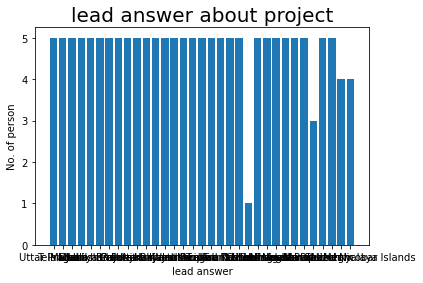

In [82]:
a = plt.bar(df1.loc[:, 'State'], df1.loc[:, 'bill_save'])
plt.xlabel('lead answer')
plt.ylabel('No. of person')
plt.title('lead answer about project', fontsize=20)
plt.style.use('fivethirtyeight')

plt.show()

as graph is not clear because of long states names 
i will download analysed data from now and will plot graph in excel for better representation. 
so that i can make business model and flags and analyse in which state we should expand our business

In [83]:
#downloading dataset so that can visualize it in excel.

In [ ]:
ownhouse.to_excel(r"C:\Users\lohani\Desktop\peacock solar\ownhouse1.xlsx")

In [84]:
state= df.groupby(['State']).count()

In [85]:
state

,What percentage of your roof are you ready to give for solar?,Plot size of the house (In Square yards),average monthly earnings,What Power Backup do you use?,How much aware are you about solar?,pwrbckup,elec_price_inc,bill_save,lowmaint,newtec,...,What maximum investment would you be willing to make in solar?,Which one would you prefer?,Which city is your house at?,sex,homeloan,knowsolar,relativehave,ownhome,plantobuildflor,knowpeacock
State,,,,,,,,,,,,,,,,,,,,,
Andaman and Nicobar Islands,1,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Andhra Pradesh,157,36,157,157,157,157,157,157,157,157,...,157,157,157,157,157,157,157,157,157,157
Arunachal Pradesh,1,0,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
Assam,164,45,164,164,164,164,164,164,164,164,...,164,164,164,164,164,164,164,164,164,164
Bihar,210,42,210,210,210,210,210,210,210,210,...,210,210,210,210,210,210,210,210,210,210
Chandigarh,28,7,28,28,28,28,28,28,28,28,...,28,28,28,28,28,28,28,28,28,28
Chhattisgarh,58,11,58,58,58,58,58,58,58,58,...,58,58,58,58,58,58,58,58,58,58
Delhi,493,98,493,493,493,493,493,493,493,493,...,493,493,493,493,493,493,493,493,493,493
Goa,3,1,3,3,3,3,3,3,3,3,...,3,3,3,3,3,3,3,3,3,3


as very few responses are from rest of state and only 7 states have sufficient responses so, that we can analyse, 
from now our analysis will only focus on these states

'Uttar Pradesh','Delhi', 'Maharashtra', 'West Bengal', 'Odisha', 'Gujarat', 'Haryana'

In [ ]:
state.to_excel(r"C:\Users\lohani\Desktop\peacock solar\state.xlsx")

In [86]:
homeloan  = df.groupby(['homeloan', 'State']).count()

In [87]:
homeloan


What percentage of your roof are you ready to give for solar?  \
homeloan State                                                                                        
0        Andaman and Nicobar Islands                                                1.0               
         Andhra Pradesh                                                            99.0               
         Arunachal Pradesh                                                          1.0               
         Assam                                                                    139.0               
         Bihar                                                                    180.0               
...                                                                                 ...               
1        Telangana                                                                 49.0               
         Tripura                                                                    3.0               
         Uttar Pradesh                                                             81.0               
         Uttarakhand                                                               17.0               
         West Bengal                                                               38.0               

                                      Plot size of the house (In Square yards)  \
homeloan State                                                                   
0        Andaman and Nicobar Islands                                       1.0   
         Andhra Pradesh                                                   20.0   
         Arunachal Pradesh                                                 0.0   
         Assam                                                            38.0   
         Bihar                                                            37.0   
...                                                                        ...   
1        Telangana                                                         6.0   
         Tripura                                                           0.0   
         Uttar Pradesh                                                    12.0   
         Uttarakhand                                                       4.0   
         West Bengal                                                      13.0   

                                      average monthly earnings  \
homeloan State                                                   
0        Andaman and Nicobar Islands                       1.0   
         Andhra Pradesh                                   99.0   
         Arunachal Pradesh                                 1.0   
         Assam                                           139.0   
         Bihar                                           180.0   
...                                                        ...   
1        Telangana                                        49.0   
         Tripura                                           3.0   
         Uttar Pradesh                                    81.0   
         Uttarakhand                                      17.0   
         West Bengal                                      38.0   

                                      What Power Backup do you use?   \
homeloan State                                                         
0        Andaman and Nicobar Islands                             1.0   
         Andhra Pradesh                                         99.0   
         Arunachal Pradesh                                       1.0   
         Assam                                                 139.0   
         Bihar                                                 180.0   
...                                                              ...   
1        Telangana                                              49.0   
         Tripura                                                 3.0   
         Uttar Pradesh                              

In [ ]:
homeloan.to_excel(r"C:\Users\lohani\Desktop\peacock solar\homeloan.xlsx")

In [88]:
avg_earning  = df.groupby(['average monthly earnings', 'State']).count()

In [89]:
avg_earning

What percentage of your roof are you ready to give for solar?  \
average monthly earnings State                                                                              
10000                    Andhra Pradesh                                                    12               
                         Arunachal Pradesh                                                  1               
                         Assam                                                             20               
                         Bihar                                                             36               
                         Chandigarh                                                         3               
...                                                                                       ...               
250000                   Telangana                                                         49               
                         Tripura                                                            4               
                         Uttar Pradesh                                                    138               
                         Uttarakhand                                                       18               
                         West Bengal                                                      106               

                                            Plot size of the house (In Square yards)  \
average monthly earnings State                                                         
10000                    Andhra Pradesh                                            1   
                         Arunachal Pradesh                                         0   
                         Assam                                                    10   
                         Bihar                                                     5   
                         Chandigarh                                                2   
...                                                                              ...   
250000                   Telangana                                                 6   
                         Tripura                                                   1   
                         Uttar Pradesh                                            22   
                         Uttarakhand                                               3   
                         West Bengal                                              28   

                                            What Power Backup do you use?   \
average monthly earnings State                                               
10000                    Andhra Pradesh                                 12   
                         Arunachal Pradesh                               1   
                         Assam                                          20   
                         Bihar                                          36   
                         Chandigarh                                      3   
...                                                                    ...   
250000                   Telangana                                      49   
                         Tripura                                         4   
                         Uttar Pradesh                                 138   
                         Uttarakhand                                    18   
                         West Bengal                                   106   

                                            How much aware are you about solar?  \
average monthly earnings State                                                    
10000                    Andhra Pradesh                                      12   
                         Arunachal Pradesh                                    1   
                         Assam                                               20   
                         Bihar                     

In [ ]:
avg_ear = avg_earning.to_excel(r"C:\Users\lohani\Desktop\peacock solar\avg_earning.xlsx")

In [91]:
df["pwrbckup"] = df["pwrbckup"].astype('category')

ANALYSING factors which encourage and discourage people from purchasing solar 

In [92]:
df["pwrbckup"].describe()

count     4535
unique       5
top          5
freq      1183
Name: pwrbckup, dtype: int64

Text(0.5, 1.0, 'Average rating of powerbackup factor in purchasing decision (1-5)')

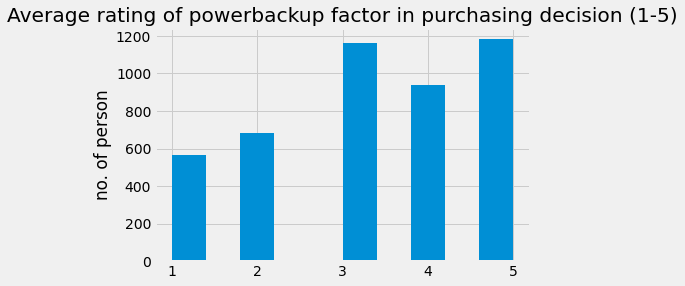

In [93]:

plt.hist(df["pwrbckup"])
plt.ylabel('no. of person')
plt.title('Average rating of powerbackup factor in purchasing decision (1-5)')

In [94]:
df["elec_price_inc"].describe()

count     4535
unique       5
top          3
freq      1255
Name: elec_price_inc, dtype: int64

Text(0.5, 1.0, 'Average rating of increasing electricity price factor in purchasing decision (1-5)')

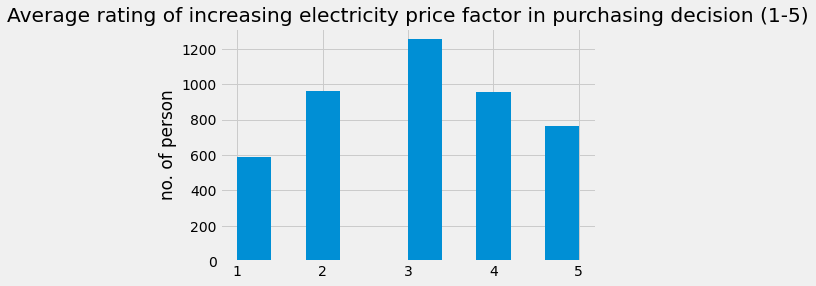

In [95]:
plt.hist(df["elec_price_inc"])
plt.ylabel('no. of person')
plt.title('Average rating of increasing electricity price factor in purchasing decision (1-5)')

In [96]:
df["bill_save"].describe()

count     4535
unique       5
top          3
freq      1330
Name: bill_save, dtype: int64

Text(0.5, 1.0, 'Average rating of electricity bill saving factor in purchasing decision (1-5)')

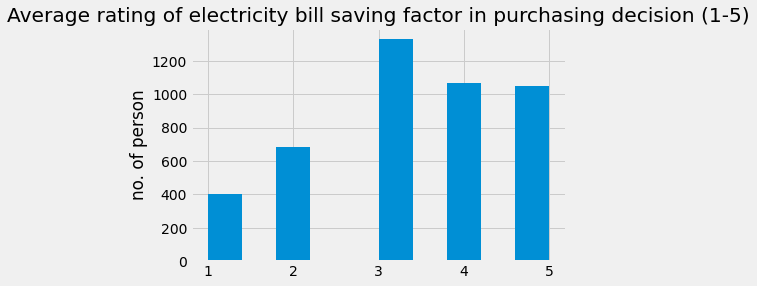

In [97]:
plt.hist(df["bill_save"])
plt.ylabel('no. of person')
plt.title('Average rating of electricity bill saving factor in purchasing decision (1-5)')

In [98]:
df["lowmaint"].describe()

count     4535
unique       5
top          3
freq      1198
Name: lowmaint, dtype: int64

Text(0.5, 1.0, 'Average rating of low maintainance cost factor in purchasing decision (1-5)')

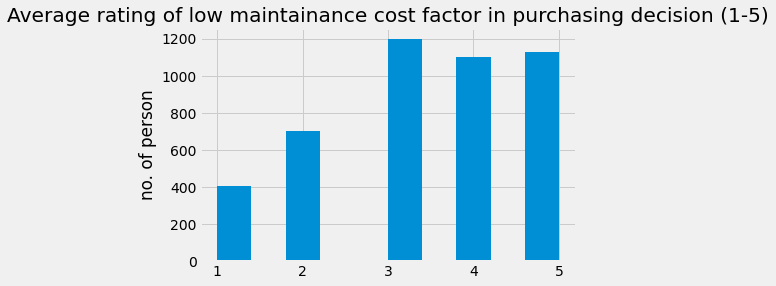

In [99]:
plt.hist(df["lowmaint"])
plt.ylabel('no. of person')
plt.title('Average rating of low maintainance cost factor in purchasing decision (1-5)')

In [100]:
df["newtec"].describe()

count     4535
unique       5
top          3
freq      1267
Name: newtec, dtype: int64

Text(0.5, 1.0, 'Average rating of interest in new technology factor in purchasing decision (1-5)')

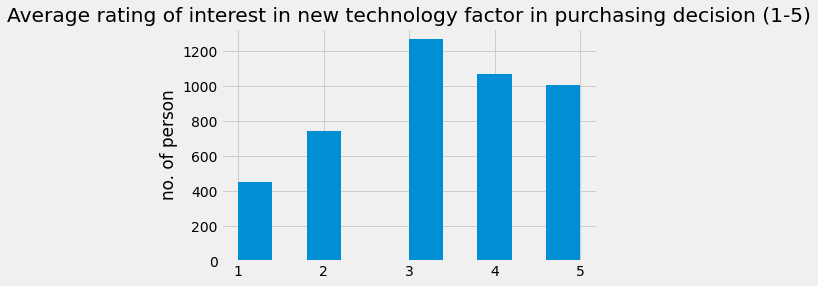

In [101]:
plt.hist(df["newtec"])
plt.ylabel('no. of person')
plt.title('Average rating of interest in new technology factor in purchasing decision (1-5)')

In [102]:
df["env_fri"].describe()

count     4535
unique       5
top          5
freq      1502
Name: env_fri, dtype: int64

Text(0.5, 1.0, 'Average rating of environment friendly factor in purchasing decision (1-5)')

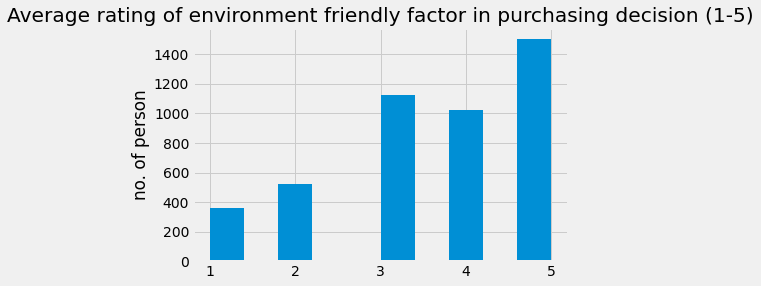

In [103]:
plt.hist(df["env_fri"])
plt.ylabel('no. of person')
plt.title('Average rating of environment friendly factor in purchasing decision (1-5)')

In [104]:
df["status_symbol"].describe()

count     4535
unique       5
top          3
freq      1268
Name: status_symbol, dtype: int64

Text(0.5, 1.0, 'Average rating of status symbol factor in purchasing decision (1-5)')

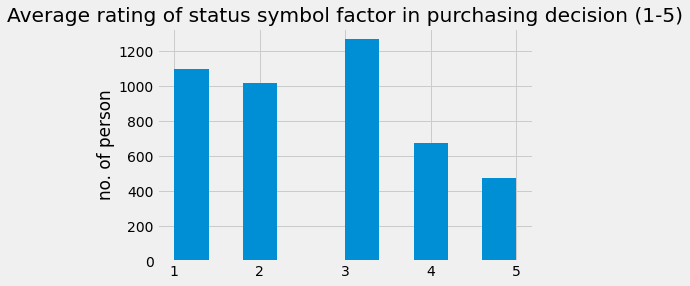

In [105]:
plt.hist(df["status_symbol"])
plt.ylabel('no. of person')
plt.title('Average rating of status symbol factor in purchasing decision (1-5)')

In [106]:
df["earnfromroof"].describe()

count     4535
unique       5
top          3
freq      1270
Name: earnfromroof, dtype: int64

Text(0.5, 1.0, 'Average rating of earning from roof factor in purchasing decision (1-5)')

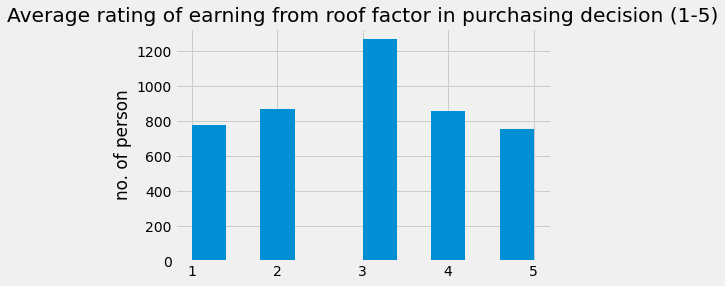

In [107]:
plt.hist(df["earnfromroof"])
plt.ylabel('no. of person')
plt.title('Average rating of earning from roof factor in purchasing decision (1-5)')

In [108]:
df["inv_pay_back"].describe()

count     4535
unique       5
top          3
freq      1294
Name: inv_pay_back, dtype: int64

Text(0.5, 1.0, 'Average rating of No. of years takes for the investment to pay back factor in discouraging from purchasing')

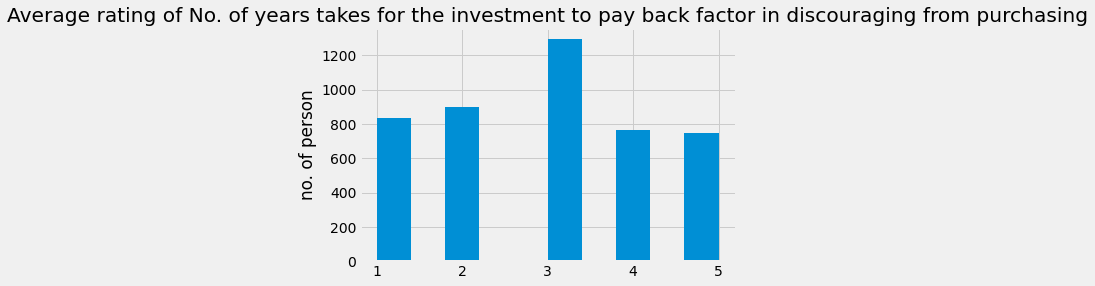

In [109]:
plt.hist(df["inv_pay_back"])
plt.ylabel('no. of person')
plt.title('Average rating of No. of years takes for the investment to pay back factor in discouraging from purchasing')

In [110]:
df["not_suff_money"].describe()

count     4535
unique       5
top          3
freq      1379
Name: not_suff_money, dtype: int64

Text(0.5, 1.0, 'Average rating of having not sufficient fund factor in discouraging from purchasing')

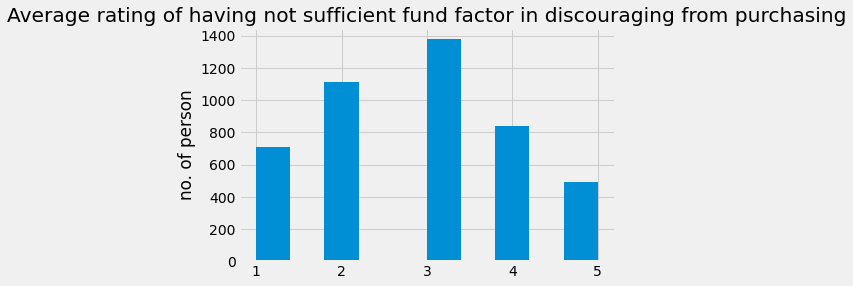

In [111]:
plt.hist(df["not_suff_money"])
plt.ylabel('no. of person')
plt.title('Average rating of having not sufficient fund factor in discouraging from purchasing')

count     4535
unique       5
top          3
freq      1447
Name: lack_govt, dtype: int64


Text(0.5, 1.0, 'Average rating of lack of govt. incentive factor in discouraging from purchasing')

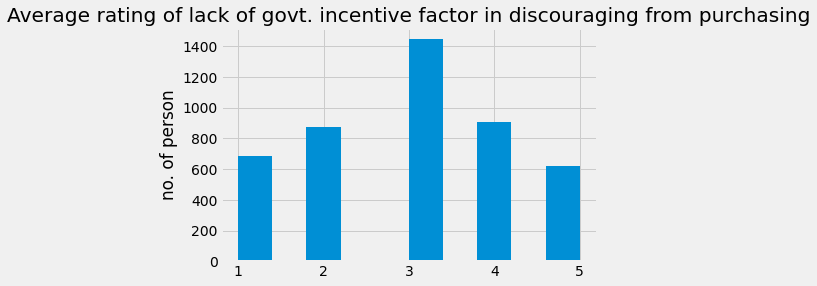

In [112]:
print(df["lack_govt"].describe())
plt.hist(df["lack_govt"])
plt.ylabel('no. of person')
plt.title('Average rating of lack of govt. incentive factor in discouraging from purchasing')

count     4535
unique       5
top          3
freq      1389
Name: lack_loan, dtype: int64


Text(0.5, 1.0, 'Average rating of lack of loan option factor in discouraging from purchasing')

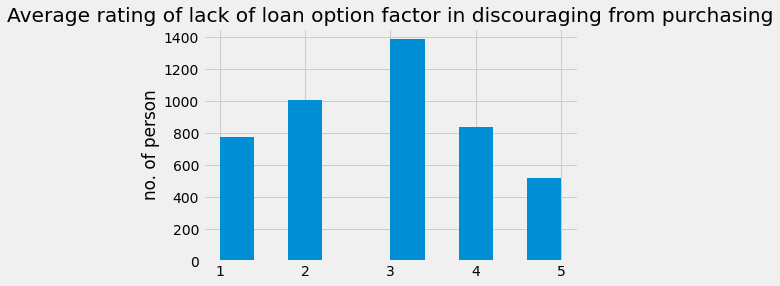

In [113]:
print(df["lack_loan"].describe())
plt.hist(df["lack_loan"])
plt.ylabel('no. of person')
plt.title('Average rating of lack of loan option factor in discouraging from purchasing')

In [114]:
lack_loan                                                            0
highcost                                                             0
outlook_house                                                        0
dont_undr_solr                                                       0
not_know_installer                                                   0
roofnotsuitable                                                      0

SyntaxError: invalid syntax (<ipython-input-114-d4312f5994e7>, line 1)

count     4535
unique       5
top          3
freq      1283
Name: highcost, dtype: int64


Text(0.5, 1.0, 'Average rating of high installation factor in discouraging from purchasing')

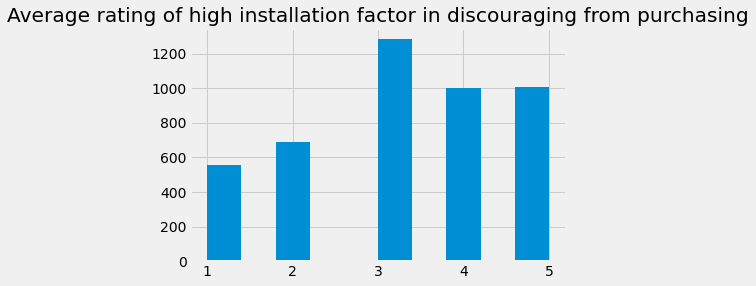

In [115]:
print(df["highcost"].describe())
plt.hist(df["highcost"])
plt.title('Average rating of high installation factor in discouraging from purchasing')

count     4535
unique       5
top          3
freq      1323
Name: outlook_house, dtype: int64


Text(0.5, 1.0, 'Average rating of look of house factor in discouraging from purchasing')

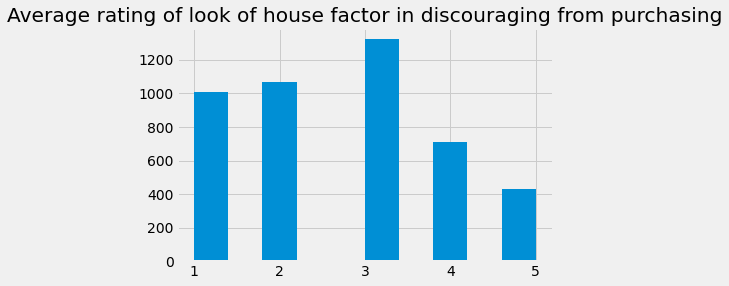

In [116]:
print(df["outlook_house"].describe())
plt.hist(df["outlook_house"])
plt.title('Average rating of look of house factor in discouraging from purchasing')

count     4535
unique       5
top          1
freq      1795
Name: dont_undr_solr, dtype: int64


Text(0.5, 1.0, "Average rating of don't understand solar factor in discouraging from purchasing")

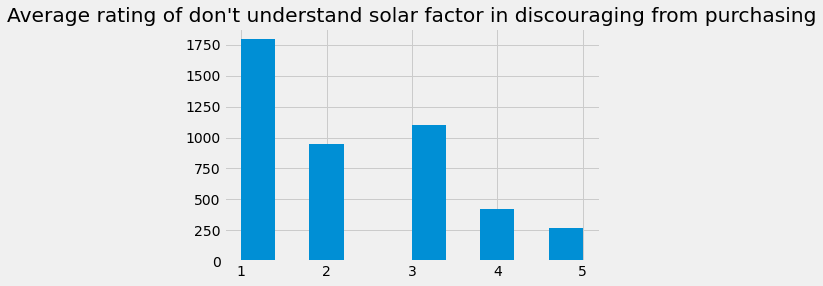

In [117]:
print(df["dont_undr_solr"].describe())
plt.hist(df["dont_undr_solr"])
plt.title("Average rating of don't understand solar factor in discouraging from purchasing")

count     4535
unique       5
top          3
freq      1245
Name: not_know_installer, dtype: int64


Text(0.5, 1.0, 'Average rating of not know installer factor in discouraging from purchasing')

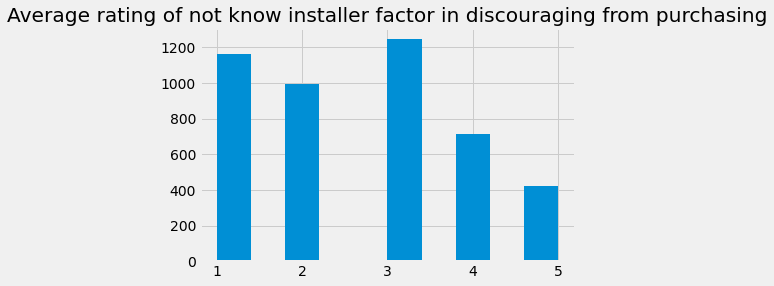

In [118]:
print(df["not_know_installer"].describe())
plt.hist(df["not_know_installer"])
plt.title("Average rating of not know installer factor in discouraging from purchasing")

count     4535
unique       5
top          1
freq      1328
Name: roofnotsuitable, dtype: int64


Text(0.5, 1.0, 'Average rating of roof not suitable factor in discouraging from purchasing')

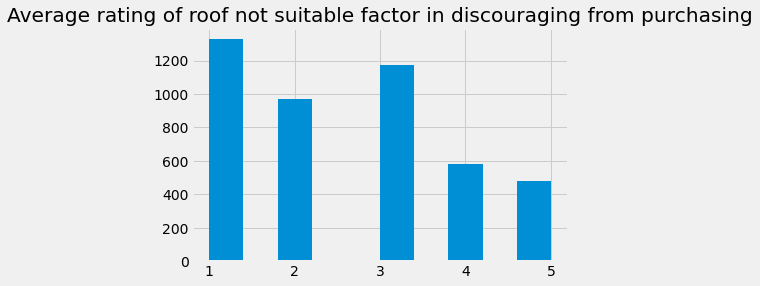

In [119]:

print(df["roofnotsuitable"].describe())
plt.hist(df["roofnotsuitable"])
plt.title("Average rating of roof not suitable factor in discouraging from purchasing")

In [134]:
state= ['Uttar Pradesh','Delhi', 'Maharashtra', 'West Bengal', 'Odisha', 'Gujarat', 'Haryana']

In [135]:
r = df['State'].isin(state)

In [136]:
rr = df[r]

Analysing company factor for business model, 
for better understanding from now see ppt of this business model analysis 

In [137]:
maxinv = rr.groupby(['What maximum investment would you be willing to make in solar?', 'State']).count()

In [138]:
aware.to_excel(r"C:\Users\lohani\Desktop\peacock solar\aware1.xlsx")

FileCreateError: [Errno 2] No such file or directory: 'C:\\Users\\lohani\\Desktop\\peacock solar\\aware1.xlsx'

In [125]:
flor = rr.groupby(['plantobuildflor', 'State']).count()

In [126]:
flor

What percentage of your roof are you ready to give for solar?  \
plantobuildflor State                                                                          
0               Delhi                                                        436               
                Gujarat                                                      253               
                Haryana                                                      226               
                Maharashtra                                                  408               
                Odisha                                                       251               
                Uttar Pradesh                                                407               
                West Bengal                                                  325               
1               Delhi                                                         57               
                Gujarat                                                       38               
                Haryana                                                       51               
                Maharashtra                                                   59               
                Odisha                                                        47               
                Uttar Pradesh                                                125               
                West Bengal                                                   49               

                               Plot size of the house (In Square yards)  \
plantobuildflor State                                                     
0               Delhi                                                85   
                Gujarat                                              55   
                Haryana                                              34   
                Maharashtra                                          91   
                Odisha                                               46   
                Uttar Pradesh                                        76   
                West Bengal                                         105   
1               Delhi                                                13   
                Gujarat                                               9   
                Haryana                                               8   
                Maharashtra                                           9   
                Odisha                                                7   
                Uttar Pradesh                                        21   
                West Bengal                                          18   

                               average monthly earnings  \
plantobuildflor State                                     
0               Delhi                               436   
                Gujarat                             253   
                Haryana                             226   
                Maharashtra                         408   
                Odisha                              251   
                Uttar Pradesh                       407   
                West Bengal                         325   
1               Delhi                                57   
                Gujarat                              38   
                Haryana                              51   
                Maharashtra                          59   
                Odisha                               47   
                Uttar Pradesh                       125   
                West Bengal                          49   

                               What Power Backup do you use?   \
plantobuildflor State                                           
0               Delhi                                     436   
                Gujarat                                   253   
                Haryana                                   226   
                Maharas

In [127]:
roof = rr.groupby(["What percentage of your roof are you ready to give for solar?", 'State']).count()

In [128]:

aware = rr.groupby(["How much aware are you about solar?", 'State']).count()
aware

What percentage of your roof are you ready to give for solar?  \
How much aware are you about solar? State                                                                          
1                                   Delhi                                                         40               
                                    Gujarat                                                       20               
                                    Haryana                                                       25               
                                    Maharashtra                                                   27               
                                    Odisha                                                        13               
                                    Uttar Pradesh                                                 33               
                                    West Bengal                                                   30               
2                                   Delhi                                                         59               
                                    Gujarat                                                       30               
                                    Haryana                                                       17               
                                    Maharashtra                                                   43               
                                    Odisha                                                        24               
                                    Uttar Pradesh                                                 41               
                                    West Bengal                                                   38               
3                                   Delhi                                                        154               
                                    Gujarat                                                       85               
                                    Haryana                                                       71               
                                    Maharashtra                                                  131               
                                    Odisha                                                        76               
                                    Uttar Pradesh                                                130               
                                    West Bengal                                                  107               
4                                   Delhi                                                        109               
                                    Gujarat                                                       77               
                                    Haryana                                                       83               
                                    Maharashtra                                                  137               
                                    Odisha                                                        94               
                                    Uttar Pradesh                                                152               
                                    West Bengal                                                  109               
5                                   Delhi                                                        131               
                                    Gujarat                                                       79               
                                    Haryana                                                       81               
                                    Maharashtra                                                  129               
                                    Odisha                                                        91       

In [129]:
knowpeacock = rr.groupby(["knowpeacock", 'State']).count()

In [130]:
knowpeacock

What percentage of your roof are you ready to give for solar?  \
knowpeacock State                                                                          
0           Delhi                                                        332               
            Gujarat                                                      244               
            Haryana                                                      203               
            Maharashtra                                                  387               
            Odisha                                                       227               
            Uttar Pradesh                                                405               
            West Bengal                                                  305               
1           Delhi                                                        161               
            Gujarat                                                       47               
            Haryana                                                       74               
            Maharashtra                                                   80               
            Odisha                                                        71               
            Uttar Pradesh                                                127               
            West Bengal                                                   69               

                           Plot size of the house (In Square yards)  \
knowpeacock State                                                     
0           Delhi                                                65   
            Gujarat                                              51   
            Haryana                                              34   
            Maharashtra                                          80   
            Odisha                                               45   
            Uttar Pradesh                                        80   
            West Bengal                                         110   
1           Delhi                                                33   
            Gujarat                                              13   
            Haryana                                               8   
            Maharashtra                                          20   
            Odisha                                                8   
            Uttar Pradesh                                        17   
            West Bengal                                          13   

                           average monthly earnings  \
knowpeacock State                                     
0           Delhi                               332   
            Gujarat                             244   
            Haryana                             203   
            Maharashtra                         387   
            Odisha                              227   
            Uttar Pradesh                       405   
            West Bengal                         305   
1           Delhi                               161   
            Gujarat                              47   
            Haryana                              74   
            Maharashtra                          80   
            Odisha                               71   
            Uttar Pradesh                       127   
            West Bengal                          69   

                           What Power Backup do you use?   \
knowpeacock State                                           
0           Delhi                                     332   
            Gujarat                                   244   
            Haryana                                   203   
            Maharashtra                               387   
            Odisha                                    227   
            Uttar Pradesh                             405   
            West Bengal                         

In [131]:
knowsolarknowsolar= rr.groupby(["knowsolar", 'State']).count()

In [ ]:
knowsolarknowsolar


 Haryana is most profitable, UP is the second option.
 In Haryana maximum people own a house,
only 17 percent of people have a home loan,
more than 57 percent of people Average earning between (45000 – 85000),
About 4 percent of people want to invest more than 250,000 highest as compared to others states.
